In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [13]:
# 1. Carregar o dataset "AirPassengers" da internet
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)

Dados de Vendas:
            Vendas
Month             
1949-01-01     112
1949-02-01     118
1949-03-01     132
1949-04-01     129
1949-05-01     121


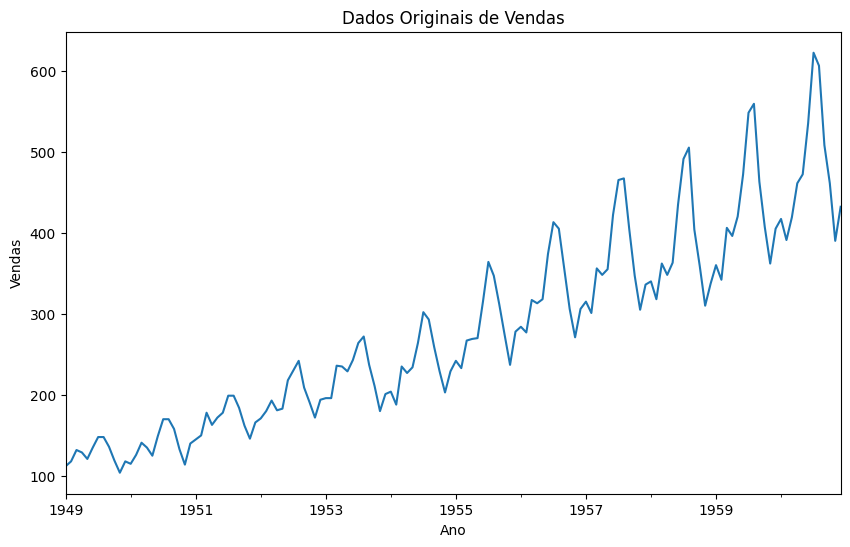

In [14]:
# 2. Preprocessar os dados
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Renomear a coluna para "Vendas" (simulando dados de vendas)
df.rename(columns={'Passengers': 'Vendas'}, inplace=True)

# Exibir as primeiras linhas do dataset
print("Dados de Vendas:")
print(df.head())

# Plotar os dados originais
df['Vendas'].plot(title="Dados Originais de Vendas", figsize=(10, 6))
plt.xlabel("Ano")
plt.ylabel("Vendas")
plt.show()

Teste ADF (Dickey-Fuller):
Estatística ADF: 0.8153688792060498
Valor-p: 0.991880243437641
Número de lags usados: 13
Os dados não são estacionários. Aplicando diferenciação...


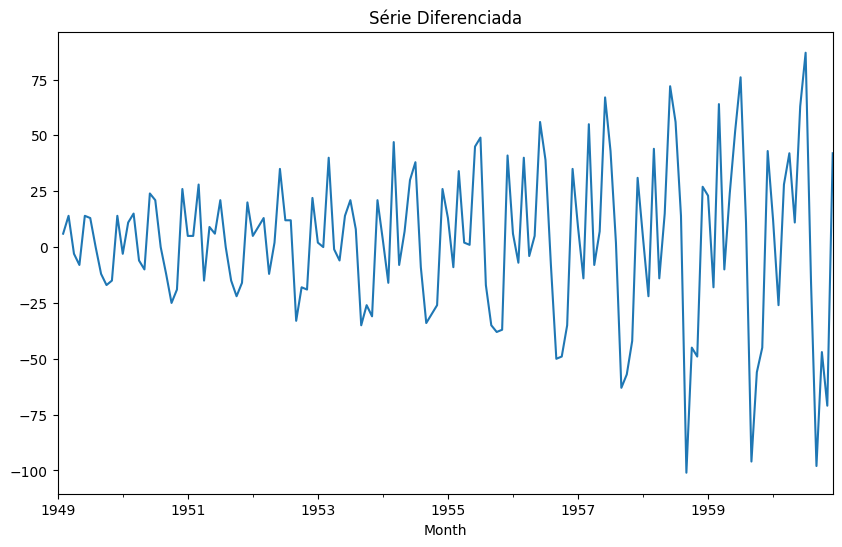

In [15]:
# 3. Verificar estacionariedade (teste ADF)
print("Teste ADF (Dickey-Fuller):")
adf_test = adfuller(df['Vendas'])
print(f"Estatística ADF: {adf_test[0]}")
print(f"Valor-p: {adf_test[1]}")
print(f"Número de lags usados: {adf_test[2]}")

# Se os dados não forem estacionários, diferenciar a série
if adf_test[1] > 0.05:
    print("Os dados não são estacionários. Aplicando diferenciação...")
    df['Vendas_diff'] = df['Vendas'].diff().dropna()

    # Plotar os dados diferenciados
    df['Vendas_diff'].plot(title="Série Diferenciada", figsize=(10, 6))
    plt.show()

In [16]:
# 4. Treinar o modelo ARIMA
# Usar parâmetros ARIMA (p=2, d=1, q=2)
train_size = int(len(df) * 0.8)
train = df['Vendas'][:train_size]
test = df['Vendas'][train_size:]

model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()

# Exibir sumário do modelo
print("Sumário do Modelo ARIMA:")
print(model_fit.summary())

Sumário do Modelo ARIMA:
                               SARIMAX Results                                
Dep. Variable:                 Vendas   No. Observations:                  115
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -523.758
Date:                Sun, 12 Jan 2025   AIC                           1057.516
Time:                        21:34:22   BIC                           1071.197
Sample:                    01-01-1949   HQIC                          1063.069
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3280      0.145      2.268      0.023       0.045       0.611
ar.L2          0.2521      0.165      1.528      0.126      -0.071       0.575
ma.L1         -0.0125      

/Users/rsfagundes/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/rsfagundes/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/rsfagundes/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


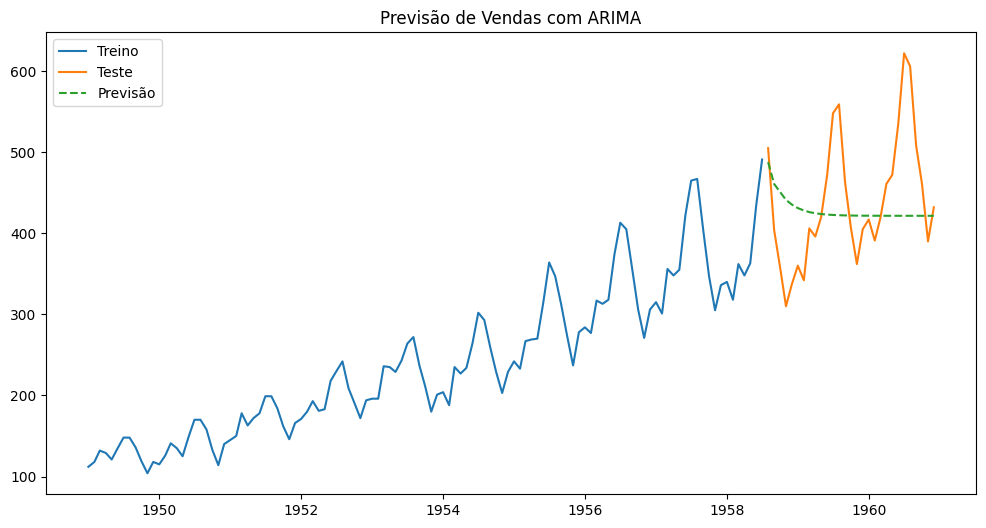

In [17]:
# 5. Previsão e Avaliação
# Prever os dados de teste
forecast = model_fit.forecast(steps=len(test))

# Plotar previsões versus dados reais
plt.figure(figsize=(12, 6))
plt.plot(train, label="Treino")
plt.plot(test, label="Teste")
plt.plot(test.index, forecast, label="Previsão", linestyle="--")
plt.legend()
plt.title("Previsão de Vendas com ARIMA")
plt.show()

/var/folders/74/ctw0cxv57bv_0qt4034v71_c0000gn/T/ipykernel_1378/3529477209.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(test.index[-1], periods=12, freq='M')


Previsões para os próximos 12 meses:
              Previsão
Data                  
1960-12-31  487.825560
1961-01-31  460.796800
1961-02-28  451.130922
1961-03-31  441.145635
1961-04-30  435.433346
1961-05-31  431.042077
1961-06-30  428.161471
1961-07-31  426.109439
1961-08-31  424.710071
1961-09-30  423.733689
1961-10-31  423.060606
1961-11-30  422.593654


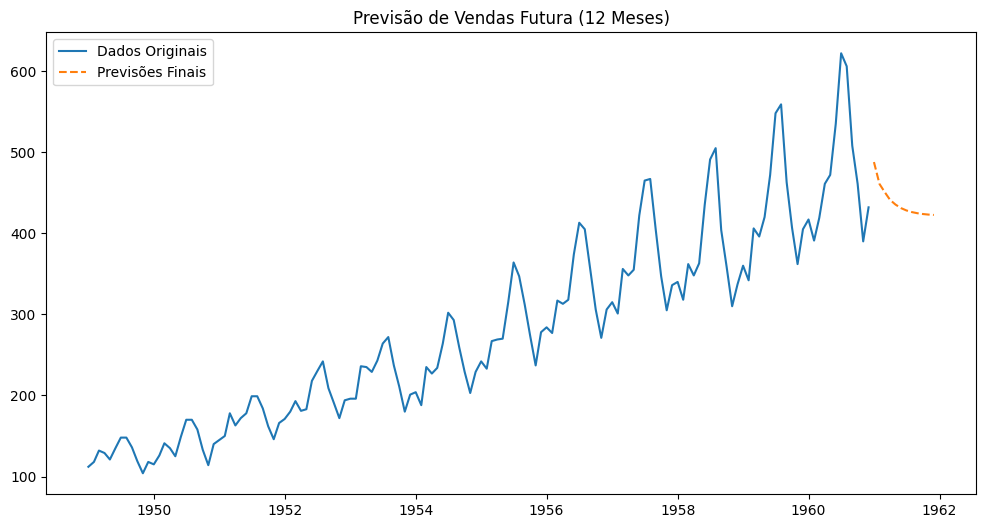

In [18]:
# 6. Previsões Finais (12 meses no futuro)
future_forecast = model_fit.forecast(steps=12)
future_dates = pd.date_range(test.index[-1], periods=12, freq='M')

# Criar um DataFrame para previsões futuras
future_df = pd.DataFrame({"Data": future_dates, "Previsão": future_forecast})
future_df.set_index("Data", inplace=True)

# Exibir previsões futuras
print("Previsões para os próximos 12 meses:")
print(future_df)

# Plotar previsões futuras
plt.figure(figsize=(12, 6))
plt.plot(df['Vendas'], label="Dados Originais")
plt.plot(future_df, label="Previsões Finais", linestyle="--")
plt.legend()
plt.title("Previsão de Vendas Futura (12 Meses)")
plt.show()